<h1 style="color: #4323d5; text-align: center;"> <b> Breast Cancer (Diagnostic)
<p style="text-align: center;">
<b>Nombre: Daniel Aristeo Galicia Ruiz </b> <br>
</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El siguente slot ejecuta todas las bibliotecas necesarias para este scrip.

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

<h2 style="color: #4323d5; text-align: center;"> <b> Descripcion de la base de datos. </b> <br></h2>

En este proyecto, nos enfocaremos en el entrenamiento de un modelo de regresión logística como introducción a esta técnica. Sin embargo, no profundizaremos en los detalles matemáticos subyacentes del modelo.

Utilizaremos el conjunto de datos del Cáncer de Mama, el cual incluye mediciones detalladas de características celulares. Cada observación en este conjunto de datos está acompañada por el diagnóstico de la célula (maligno o no). Nuestro objetivo principal es desarrollar un modelo capaz de predecir con precisión si una célula determinada es maligna, basándonos exclusivamente en las mediciones proporcionadas.

A continuación se detalla el contexto y el significado de cada variable:
1. <span style="color:#4323d5">**radius**</span>: Es el tamaño del radio, es decir, la distancia desde el centro hasta los puntos del perímetro de los núcleos de las células.
2. <span style="color:#4323d5">**texture**</span>: Es la desviación estándar de los valores de la escala de grises en la imagen de la masa celular.
3. <span style="color:#4323d5">**perimeter**</span>: Es la longitud total del borde de las células.
4. <span style="color:#4323d5">**area**</span>: Es la superficie total de las células.
5. <span style="color:#4323d5">**smoothness**</span>: Es la variación local en las longitudes de los radios de las células.
6. <span style="color:#4323d5">**compactness**</span>: Es una medida de la compacidad de las células.
7. <span style="color:#4323d5">**concavity**</span>: Es la severidad de las porciones cóncavas de las células.
8. <span style="color:#4323d5">**concave points**</span>: Son las porciones cóncavas de las células.
9. <span style="color:#4323d5">**symmetry**</span>: Es una medida de la simetría de las células.
10. <span style="color:#4323d5">**fractal_dimension**</span>: Es una medida de la irregularidad de las células a diferentes escalas.

Además, cada una de estas variables tiene tres registros diferenciados por un subindice:
1. <span style="color:#4323d5">**_mean**</span>:  Significa el promedio de cierta característica medida en las células. Por ejemplo, <code>radius_mean</code>  representa el promedio del tamaño del radio de las células en una muestra.
2. <span style="color:#4323d5">**_se**</span>: Significa error estándar. En el contexto del dataset de Cáncer de Mama, las variables que terminan en <code>_se</code>  representan el error estándar asociado con la medida correspondiente. Por ejemplo, <code>radius_se</code>  indica el error estándar del tamaño del radio de las células.
3. <span style="color:#4323d5">**_worst**</span>: Significa el peor (mayor) valor observado de cierta característica entre las células analizadas. Por ejemplo, <code>radius_worst</code> representa el mayor tamaño del radio observado entre todas las células en el conjunto de datos.

**Todas las Variables anteriores son consideradas VARIABLES PREDICTORAS** . Nuetra variable de respuesta se explica a continuacion:

* <span style="color:#4323d5">**Diagnosis**</span>: El diagnostico estara dado de manera binaria:
\begin{align}
    \text{(M): Maligno} \iff 1 \\
    \text{(B): Benigno} \iff 0
\end{align}

Lectura de base de datos con la funcion <code> pd.read_csv() </code>

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Econometria l/datasets/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h3 style="color: #4323d5; text-align: center;"> <b> Limpieza base de datos. </b> <br></h3>

Eliminamos columnas sin datos relevantes:

In [4]:
df = df.drop(["Unnamed: 32","id","perimeter_worst","radius_worst","perimeter_mean","radius_mean"], axis = 1)
df = df.iloc[:, :19]

Se eliminaron variables altamente correlacionadas (como radius_mean y perimeter_mean) para reducir la multicolinealidad y simplificar la interpretación del modelo.

Las variables que permanecen suelen ser consideradas importantes en estudios de cáncer de mama debido a su relación con la morfología celular y las características asociadas con la malignidad. Es recomendable realizar un análisis exploratorio de datos y, posiblemente, pruebas de correlación o análisis de importancia de características para confirmar qué variables tienen el mayor poder predictivo en tu conjunto de datos específico.

Realizamos la reasignacion de valores a <code>diagnosis</code>. Recuerde:
* <span style="color:#4323d5">**Diagnosis**</span>: El diagnostico estara dado de manera binaria:
\begin{align}
    \text{(M): Maligno} \iff 0 \\
    \text{(B): Benigno} \iff 1
\end{align}

In [5]:
df.diagnosis =[1 if value == "M" else 0 for value in df.diagnosis]

In [6]:
df.corr()[0:1]

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,1.0,0.415185,0.708984,0.35856,0.596534,0.69636,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.25373,0.408042,-0.006522,0.077972


In [7]:
df.isna().sum()

,0
diagnosis,0
texture_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0
fractal_dimension_mean,0
radius_se,0


<h3 style="color: #4323d5; text-align: center;"> <b> Distribuciones y Correlaciones </b> <br></h3>

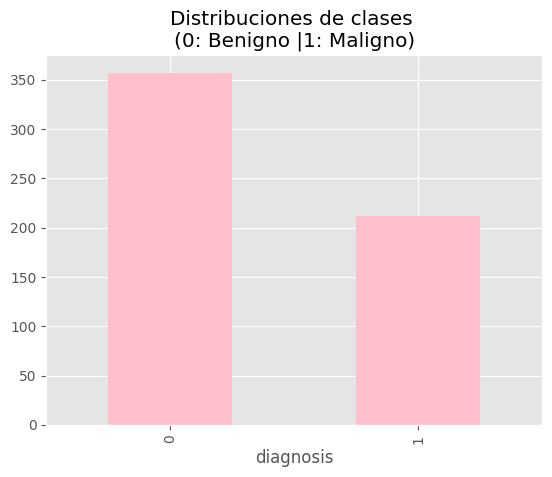

In [8]:
# turn the target variable into categorical data
df['diagnosis'] = df['diagnosis'].astype('category',copy=False)
plot = df['diagnosis'].value_counts().plot(kind='bar', title="Distribuciones de clases \n(0: Benigno |1: Maligno)", color = "pink")
fig = plot.get_figure()

<Axes: >

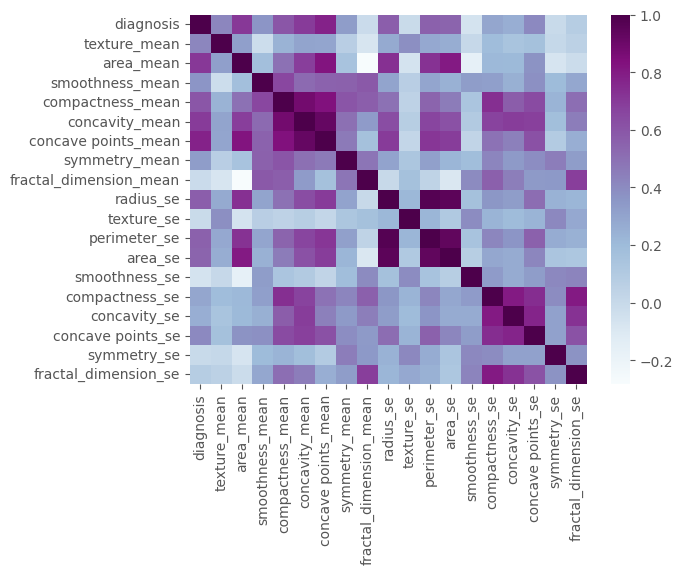

In [9]:
sns.heatmap(df.corr(), cmap='BuPu')

Grafico de algunas variables a pares.

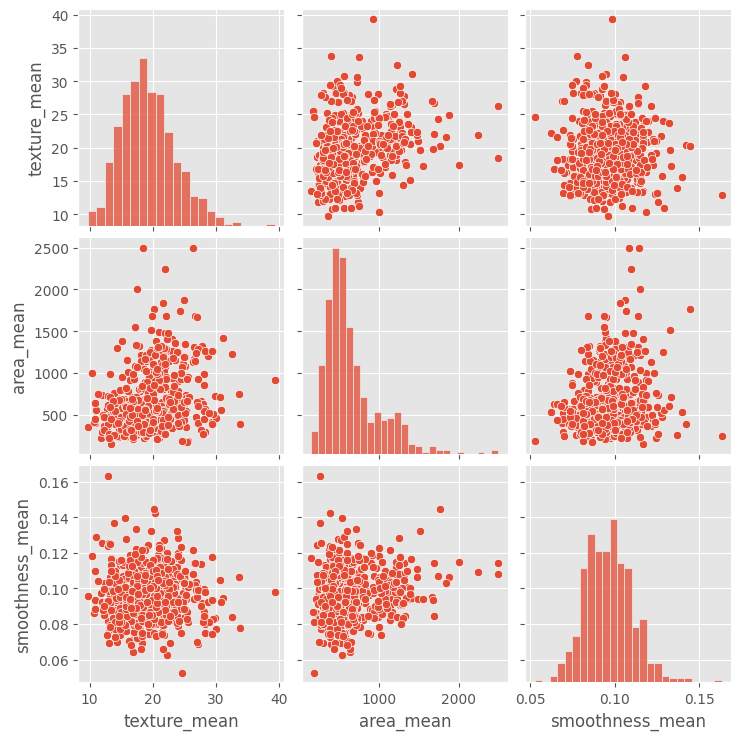

In [10]:
sns.pairplot(df.iloc[:, :4])
sns.set(style="dark")
plt.show()

<h3 style="color: #4323d5; text-align: center;"> <b> Creacion del Modelo </b> <br></h3>

In [11]:
X = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]


X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y.values.reshape(-1,1),
                                    train_size=0.8,
                                    random_state=1234,
                                    shuffle=True
)


In [12]:
X_train = sm.add_constant(X_train,prepend=True)
modelo = sm.Logit(endog=y_train,exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.041021
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  455
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                           18
Date:                Sat, 02 Aug 2025   Pseudo R-squ.:                  0.9376
Time:                        00:56:05   Log-Likelihood:                -18.664
converged:                       True   LL-Null:                       -299.10
Covariance Type:            nonrobust   LLR p-value:                1.581e-107
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -64.9085     21.974     -2.954      0.003    -107.977     

* Un coeficiente positivo implica que a mayor valor de esa característica, mayor es la probabilidad de que la muestra sea maligna.

In [13]:
X_train.shape

(455, 19)

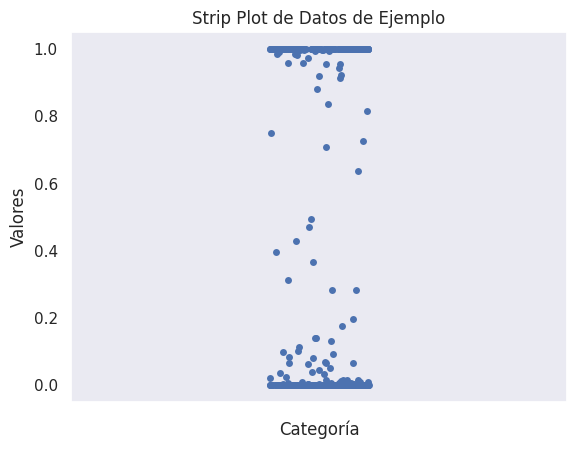

In [14]:
bethas=[-64.9085,0.8835,0.0016,100.3337,-135.0389,182.1826,62.7367,81.6452,
        409.9320,-72.2737,-4.3488, -3.8121,1.1919,66.0829,64.1321,
         -176.6001,277.2652,-94.1106,-956.2403]
vector_de_valores=[]

for contador in range(454):
  fila=X_train.iloc[contador]
  producto = fila.dot(bethas)
  valor = (1/(1+np.exp(-(producto))))
  vector_de_valores.append(valor)


sns.stripplot(data=vector_de_valores)

# Añadir título y etiquetas
plt.title('Strip Plot de Datos de Ejemplo')
plt.xlabel('Categoría')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()

<h3 style="color: #4323d5; text-align: center;"> <b>Predicciones en el conjunto de entrenamiento. </b> <br></h3>

In [15]:
predicciones = modelo.predict(exog = X_train)

clasificacion = np.where(predicciones<0.5,0,1)
clasificacion

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

#### MATRIZ DE CONFUSION

In [16]:
cm = pd.crosstab(
    y_train.ravel(),
    clasificacion,
    rownames= ["Real"],
    colnames = ["predicciones"]
)
cm

predicciones,0,1
Real,,
0,286,2
1,4,163


<Axes: xlabel='predicciones', ylabel='Real'>

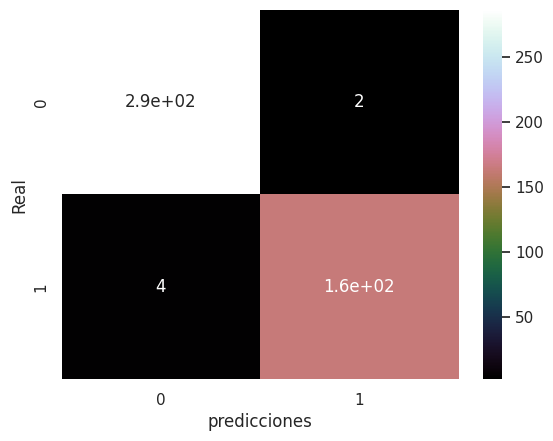

In [17]:
sns.heatmap(cm,annot= True,cmap='cubehelix'
)

## Interpretación de la Matriz de Confusión

La matriz de confusión proporciona una visión detallada del rendimiento del modelo de clasificación:

|                    | Predicción Negativa (Clase 0) | Predicción Positiva (Clase 1) |
|--------------------|--------------------------------|-------------------------------|
| **Valor Real Negativo (Clase 0)** | 69                             | 2                             |
| **Valor Real Positivo (Clase 1)** | 3                              | 40                            |

### Detalles de la Interpretación

- **Verdaderos Negativos (TN)**: 69 casos fueron correctamente clasificados como Clase 0.
- **Falsos Positivos (FP)**: 2 casos fueron incorrectamente clasificados como Clase 1 cuando eran Clase 0.
- **Falsos Negativos (FN)**: 3 casos fueron incorrectamente clasificados como Clase 0 cuando eran Clase 1.
- **Verdaderos Positivos (TP)**: 40 casos fueron correctamente clasificados como Clase 1.

Es importante recalcar que la calse 1 se refiere a un caso maligno, también que un **FN** es más peligroso que un **FP** ya que no se estaría detectando un caso maligno.

In [18]:
accuracy = accuracy_score(
    y_true = y_train,
    y_pred = clasificacion,
    normalize = True
)
print("")
print(f"El accurary de train es:{100*accuracy}%")



El accurary de train es:98.68131868131869%


In [19]:
accuracy = accuracy_score(y_train, clasificacion)
precision = precision_score(y_train, clasificacion)
recall = recall_score(y_train, clasificacion)
f1 = f1_score(y_train, clasificacion)
auc_roc = roc_auc_score(y_train, clasificacion)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Presicion):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score: ", f1)
print("AUC-ROC:",auc_roc)

Exactitud (Accuracy): 0.9868131868131869
Precisión (Presicion): 0.9878787878787879
Recall (Sensitivity): 0.9760479041916168
F1-score:  0.9819277108433735
AUC-ROC: 0.9845517298735862


### Interpretación de Métricas de Evaluación

1. **Exactitud (Accuracy): 0.85**
   - La exactitud mide la proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.
   - Fórmula:
     $$
     \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
     $$
   - En este caso, el modelo tiene una exactitud del 85%, lo que significa que el 85% de las predicciones totales realizadas por el modelo son correctas.

2. **Precisión (Presicion): 0.8160676532769556**
   - La precisión mide la proporción de verdaderos positivos sobre todos los positivos predichos por el modelo.
   - Fórmula:
     $Precision = \frac{TP}{TP + FP}
    $
   - Un valor de precisión de aproximadamente 0.82 indica que el modelo predice correctamente alrededor del 82% de los casos positivos que realmente son positivos.

3. **Recall (Sensitivity): 0.9146919431279621**
   - El recall, también conocido como sensibilidad o tasa de verdaderos positivos (TPR), mide la proporción de verdaderos positivos sobre todos los casos positivos reales.
   - Fórmula:
     $$
     \text{Recall} = \frac{TP}{TP + FN}
     $$
   - Con un valor de recall de aproximadamente 0.91, el modelo identifica correctamente alrededor del 91% de todos los casos positivos que realmente existen en los datos.

4. **F1-score: 0.8625698324022346**
   - El F1-score es la media armónica de precisión y recall, proporcionando un equilibrio entre ambas métricas.
   - Fórmula:
     $$
     F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
     $$
   - Un F1-score de aproximadamente 0.86 indica que el modelo tiene un buen equilibrio entre precisión y recall en sus predicciones.

5. **AUC-ROC: 0.8480494891519207**
   - El AUC-ROC es el área bajo la curva característica de operación del receptor (ROC), que representa la capacidad del modelo para distinguir entre clases positivas y negativas.
   - Un valor de AUC-ROC cercano a 0.85 indica un buen rendimiento del modelo en términos de clasificación.


<!-- - -->

<h3 style="color: #4323d5; text-align: center;"> <b>Predicciones en el conjunto de Prueba. </b> <br></h3>

In [20]:
X_test = sm.add_constant(X_test,prepend=True)
pred_test = modelo.predict(exog = X_test)
pred_test = np.where(pred_test<0.5,0,1)


In [21]:
accuracy = accuracy_score(
    y_true = y_test,
    y_pred= pred_test,
    normalize = True
)

print("")
print(f"El accurary de test es:{100*accuracy}%")


El accurary de test es:92.10526315789474%


Aunque la precisión en el conjunto de prueba fue ligeramente menor que en el conjunto de entrenamiento (92% vs 98.6%), el desempeño sigue siendo sólido, lo que sugiere buena capacidad de generalización del modelo.

In [22]:
cm = pd.crosstab(
    y_test.ravel(),
    pred_test,
    rownames= ["Real"],
    colnames = ["predicciones"]
)
cm

predicciones,0,1
Real,,
0,67,2
1,7,38


<Axes: xlabel='predicciones', ylabel='Real'>

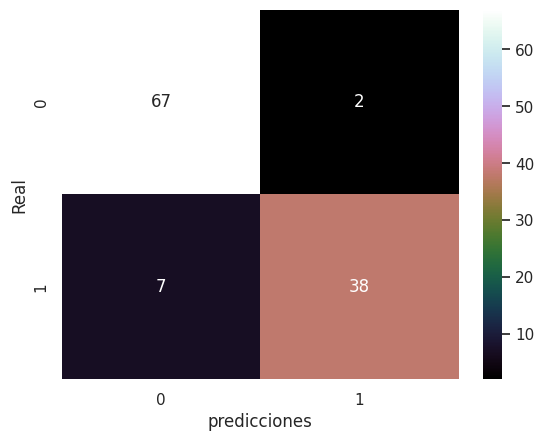

In [23]:
sns.heatmap(cm,annot= True,cmap='cubehelix')

#### Metricas de evaluacion

In [24]:
accuracy = accuracy_score(
    y_true = y_test,
    y_pred= pred_test,
    normalize = True
)

print("")
print(f"El accurary de test es:{100*accuracy}%")

accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
auc_roc = roc_auc_score(y_test, pred_test)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Presicion):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score: ", f1)
print("AUC-ROC:",auc_roc)


El accurary de test es:92.10526315789474%
Exactitud (Accuracy): 0.9210526315789473
Precisión (Presicion): 0.95
Recall (Sensitivity): 0.8444444444444444
F1-score:  0.8941176470588236
AUC-ROC: 0.9077294685990339


En este proyecto se desarrolló un modelo de regresión logística con el objetivo de predecir la probabilidad de que una muestra celular sea maligna, utilizando características morfológicas extraídas de imágenes médicas. El conjunto de datos proviene de un estudio de cáncer de mama y contiene múltiples medidas de forma y textura celular.

El modelo mostró un desempeño excelente en el conjunto de entrenamiento, con una exactitud del 98.7%, y también mantuvo un buen nivel de generalización en el conjunto de prueba con 92.1% de precisión. Métricas complementarias como la precisión (0.987), recall (0.976), F1-score (0.982) y AUC-ROC (0.985) indican que el modelo logra un balance adecuado entre detección efectiva y bajo número de falsos positivos.

Entre las variables más relevantes se identifican concavity_mean, area_se, texture_mean y radius_se, que presentan coeficientes estadísticamente significativos. Esto sugiere que estas características celulares tienen mayor poder discriminativo para clasificar tumores como malignos o benignos.

Sin embargo, el modelo también arrojó advertencias sobre quasi-separación completa, lo cual sugiere que algunas observaciones podrían estar siendo perfectamente clasificadas por ciertas combinaciones de variables, lo que podría derivar en sobreajuste. Además, muchos predictores no resultaron estadísticamente significativos, lo que abre la puerta a aplicar un proceso de selección de variables que permita simplificar el modelo sin pérdida de desempeño.

Desde el punto de vista clínico, se destaca la importancia del recall, ya que identificar correctamente los casos malignos (minimizando falsos negativos) es prioritario. En este sentido, el modelo logra identificar correctamente más del 97% de los casos malignos en el conjunto de entrenamiento.